In [162]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as wgt
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


def readFromFile():
    file=pd.read_csv("winequality-white.csv",delimiter=';',engine='python')
    x=file.iloc[:,:-1].values.tolist()
    x=np.array(x)
    y=file.iloc[:,-1:].values.tolist()
    y=np.array(y)
    return x,y

def readMatrix():
    file=pd.read_csv("winequality-white.csv",delimiter=';',engine='python')
    x=file.iloc[:,:].values.tolist()
    x=np.array(x)
    return x

def scalareMatrice(x):
    maxes=np.max(x,axis=0)
    mins=np.min(x, axis=0)
    x=(x-mins)/(maxes-mins)
    return x, maxes, mins

def addColumn(x):
    z = np.ones((x.shape[0],1))
    x=np.append(z,x,axis=1)
    return x

def pseudoinversa():
    X,Y=readFromFile()
    #X,maxim,minim=scalareMatrice(X)
    #X=addColumn(X)
    
    theta=np.matmul(np.linalg.pinv(X),Y)
    ipoteza=np.matmul(X,theta)
    
    print("Hypothesis, Initial output quality: \n",np.append(ipoteza, Y,axis=1))
    
    diferenta=(ipoteza-Y)**2
    eroare=(1/(2*X.shape[0]))*np.sum(diferenta)
    print("Pseudoinversa J:",eroare)
    
def functie_cost(X,Y,theta):
    ipoteza=np.matmul(X,theta)    
    diferenta=(ipoteza-Y)**2
    eroare=(1/(2*X.shape[0]))*np.sum(diferenta)
    print(np.append(ipoteza, Y,axis=1))
    return eroare


In [163]:
def gradient_descent(theta,X,Y,alpha,no_iterations):
    past_costs = []
    past_thetas = [theta]
    theta_precedent = 0
    
    for i in range(no_iterations):
        ipoteza = np.matmul(X, theta)
        diferenta = ipoteza-Y
        
        cost =1/(2*X.shape[0])*np.sum(diferenta**2)
        past_costs.append(cost)
        
        theta = theta - alpha*((1/X.shape[0]) * np.sum(diferenta*X))
        past_thetas.append(theta)
        
        if np.allclose(past_thetas[-1].T, past_thetas[-2].T, rtol=1e-20):
            print(i)
            break
            
        theta_precedent = theta
   
    return past_thetas, past_costs

def gd_plot():
    np.random.seed(123)
    
    X,Y=readFromFile()
    X,maxim,minim=scalareMatrice(X)
    X=addColumn(X)
   
    theta=np.random.rand(X.shape[1],1)
    past_thetas, past_costs = gradient_descent(theta,X, Y,0.4,1000) 
    print("Gradient descent J:",past_costs[-1])
    
    plt.title('J(theta)')
    plt.xlabel('No. of iterations')
    plt.ylabel('Cost')
    plt.plot(past_costs)
    plt.show()


In [164]:
def testare():
    np.random.seed(1)
    X,Y=readFromFile()
    np.random.shuffle(X)
    X,maxim,minim=scalareMatrice(X)
    X=addColumn(X)
    np.random.shuffle(Y)
    theta=np.random.rand(X.shape[1],1)
    
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)
    
    past_thetas, past_costs = gradient_descent(theta,X_train, y_train,0.006,1000)
    #print(past_costs[-1])
    
    theta=past_thetas[-1]
    print(functie_cost(X_test,y_test,theta))
    #past_thetas, past_costs = gradient_descent(theta,X_test, y_test,0.006,1000) 
    #print(past_costs[-1])



In [165]:
def testare2():
    np.random.seed(1)
    X=readMatrix()
    np.random.shuffle(X)
    Y=X[:,-1:]
    X=X[:,:-1]
    X,maxim,minim=scalareMatrice(X)
    X=addColumn(X)
    

    theta=np.random.rand(X.shape[1],1)
    
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)
    past_thetas, past_costs = gradient_descent(theta,X_train, y_train,0.01,1000)
    #print(past_costs[-1])
    
    theta=past_thetas[-1]
    print("Dupa testare:",functie_cost(X_test,y_test,theta))
    #past_thetas, past_costs = gradient_descent(theta,X_test, y_test,0.006,1000) 
    #print(past_costs[-1])

Hypothesis, Initial output quality: 
 [[5.60198534 6.        ]
 [5.29184303 6.        ]
 [5.67112255 6.        ]
 ...
 [5.39202521 6.        ]
 [6.57075553 7.        ]
 [6.31167295 6.        ]]
Pseudoinversa J: 0.285253523012379


C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in square
  # Remove the CWD from sys.path while we load stuff.


Gradient descent J: nan


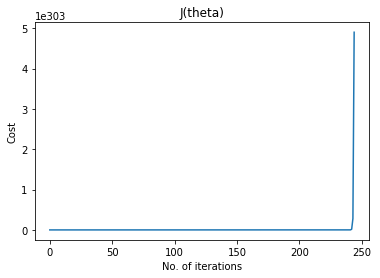

118
[[5.97193281 6.        ]
 [6.28496105 7.        ]
 [5.46858452 5.        ]
 ...
 [5.9391681  7.        ]
 [5.66681835 4.        ]
 [6.13298552 5.        ]]
Dupa testare: 0.4652641072326882


In [166]:
def main():
    pseudoinversa()
    gd_plot()
    testare2()
    
main()